In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('coteq_electricity_2019.csv')


In [ ]:
df.info()

In [ ]:
df.head(10)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4037,89.47,0.0
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100.00,97.50,80,1x35,2642,95.00,0.0
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1313,100.00,0.0
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,92.68,85.37,54,3x25,6405,92.68,0.0
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36,3x25,4742,100.00,0.0
5,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AH,7471AH,GOOR,20,85.00,100.00,50,1x35,4924,95.00,0.0
6,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AJ,7471AJ,GOOR,11,90.91,100.00,64,3x25,3084,100.00,0.0
7,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AK,7471AK,GOOR,21,90.48,85.71,38,1x35,5795,85.71,0.0
8,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AL,7471AL,GOOR,12,100.00,100.00,67,1x35,4309,100.00,0.0
9,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AM,7471AN,GOOR,17,88.24,94.12,53,3x25,7845,100.00,0.0


The columns in each file are:

net_manager: code of the regional network manager

purchase_area: code of the area where the energy is purchased

street: Name of the street

zipcode_from and zipcode_to: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters

city: Name of the city

num_connections: Number of connections in the range of zipcodes

delivery_perc: percentage of the net consumption of electricity. The lower, the more energy was given back to the grid (for example if you have solar panels)

perc_of_active_connections: Percentage of active connections in the zipcode range

type_of_connection: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. For gas is G4, G6, G10, G16, G25

type_conn_perc: percentage of presence of the principal type of connection in the zipcode range

annual_consume: Annual consume. Kwh for electricity, m3 for gas

annual_consume_lowtarif_perc: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.

smartmeter_perc: percentage of smartmeters in the zipcode ranges

Text(0, 0.5, 'Energy Consumption (KwH)')

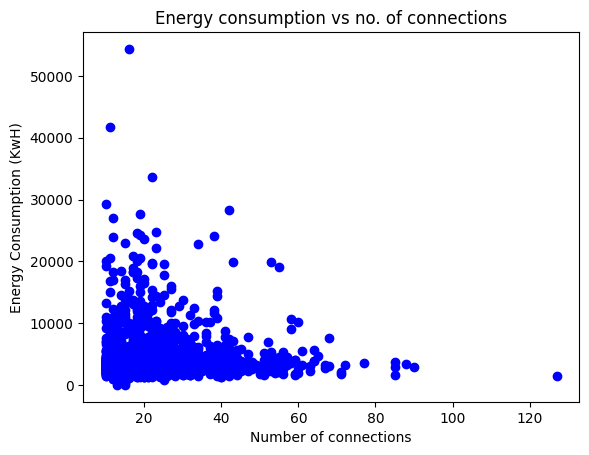

In [ ]:
target_regressor = df['annual_consume']
df.drop('annual_consume', axis=1, inplace=True)
target_classifier = df['city']


y1 = target_regressor
x1 =  df['num_connections']

plt.scatter(x1, y1, color='blue')
plt.title("Energy consumption vs no. of connections")
plt.xlabel("Number of connections")
plt.ylabel("Energy Consumption (KwH)")

<BarContainer object of 2563 artists>

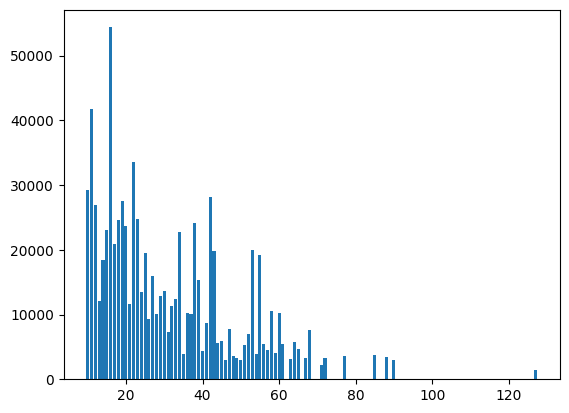

In [ ]:
plt.bar(x1, y1)

<BarContainer object of 2563 artists>

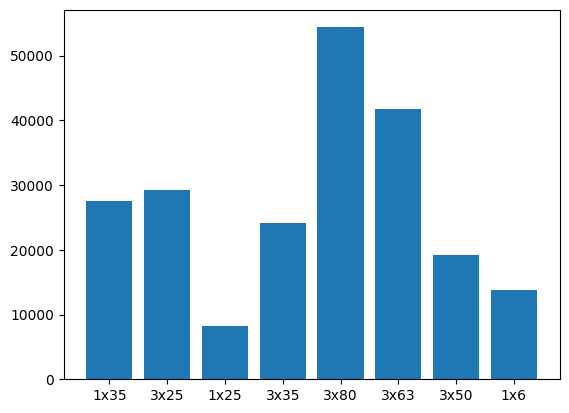

In [ ]:
x2 = df['type_of_connection']

plt.bar(x2, y1)

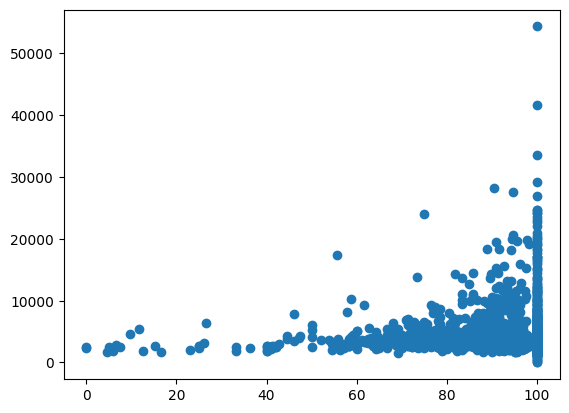

In [ ]:
x3 = df['delivery_perc']

plt.scatter(x3, y1)

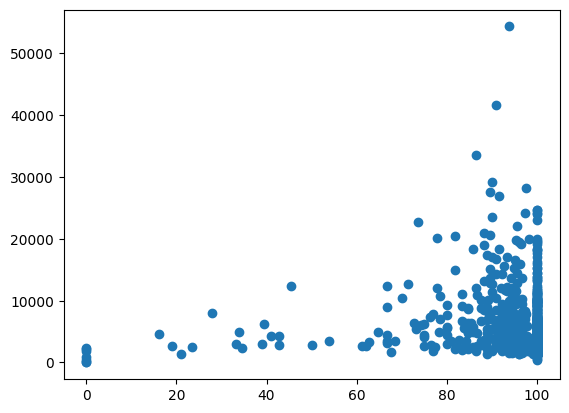

In [ ]:
x4 = df['perc_of_active_connections']

plt.scatter(x4, y1)

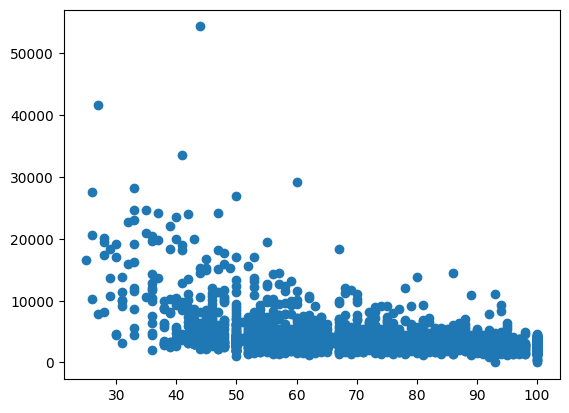

In [ ]:
x5 = df['type_conn_perc']
plt.scatter(x5, y1)

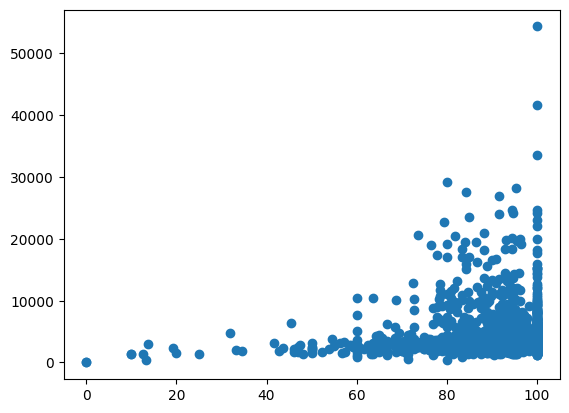

In [ ]:
x6 = df['annual_consume_lowtarif_perc']
plt.scatter(x6, y1)

In [ ]:
df= df.drop(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city'],axis=1)

In [ ]:
df.head(10)

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume_lowtarif_perc,smartmeter_perc
0,19,89.47,94.74,89,1x35,89.47,0.0
1,40,100.00,97.50,80,1x35,95.00,0.0
2,16,100.00,100.00,100,1x35,100.00,0.0
3,41,92.68,85.37,54,3x25,92.68,0.0
4,14,85.71,100.00,36,3x25,100.00,0.0
5,20,85.00,100.00,50,1x35,95.00,0.0
6,11,90.91,100.00,64,3x25,100.00,0.0
7,21,90.48,85.71,38,1x35,85.71,0.0
8,12,100.00,100.00,67,1x35,100.00,0.0
9,17,88.24,94.12,53,3x25,100.00,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type_of_connection'] = label_encoder.fit_transform(df['type_of_connection'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(df, target_regressor, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2072074 , 0.17841418, 0.14762494, 0.13924519, 0.13008554,
       0.10273704, 0.09468571])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

y_pred = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.4042626360500122

In [ ]:
features = df[['num_connections', 'delivery_perc', 'perc_of_active_connections',
       'type_conn_perc', 'type_of_connection', 'annual_consume_lowtarif_perc',
       'smartmeter_perc']]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

RFR.fit(X_train, Y_train)
y_pred = RFR.predict(X_test)

score = r2_score(y_test, y_pred)

In [ ]:
print(score)

0.5648182996778843


<Axes: title={'center': 'Random Forest Regressor: Actual vs Predicted'}, xlabel='annual_consume', ylabel='Predicted Values'>

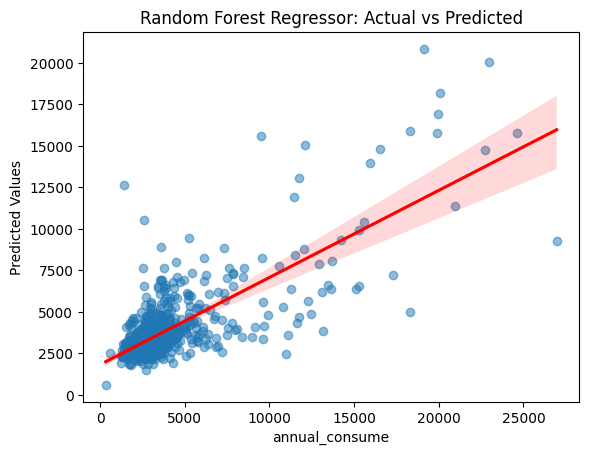

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')

In [ ]:
X_train_c, X_test_c, Y_train_c, y_test_c = train_test_split(features, target_classifier, test_size = 0.3, random_state= 0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_c, Y_train_c)

log_reg_pred = log_reg.predict(X_test_c)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score = accuracy_score(y_test_c, log_reg_pred)
score

0.6332899869960988

In [ ]:
cnf = confusion_matrix(y_test_c, log_reg_pred)

In [ ]:
print(cnf)

[[437   7  29]
 [ 57  12   9]
 [179   1  38]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(X_train_c, Y_train_c)
knn_pred = knn.predict(X_test_c)
score = accuracy_score(y_test_c, knn_pred)
score
cnf = confusion_matrix(y_test_c, knn_pred)
cnf

array([[429,   5,  39],
       [ 53,  17,   8],
       [145,   8,  65]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth = None,
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 70)

RFC.fit(X_train_c, Y_train_c)
RFC_pred = RFC.predict(X_test_c)


In [ ]:
score = accuracy_score(y_test_c, RFC_pred)
score

0.6710013003901171

In [ ]:
cnf = confusion_matrix(y_test_c, knn_pred)
cnf

array([[429,   5,  39],
       [ 53,  17,   8],
       [145,   8,  65]])

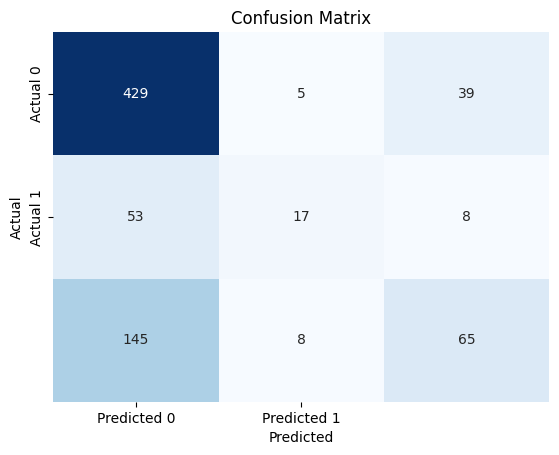

In [ ]:
sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

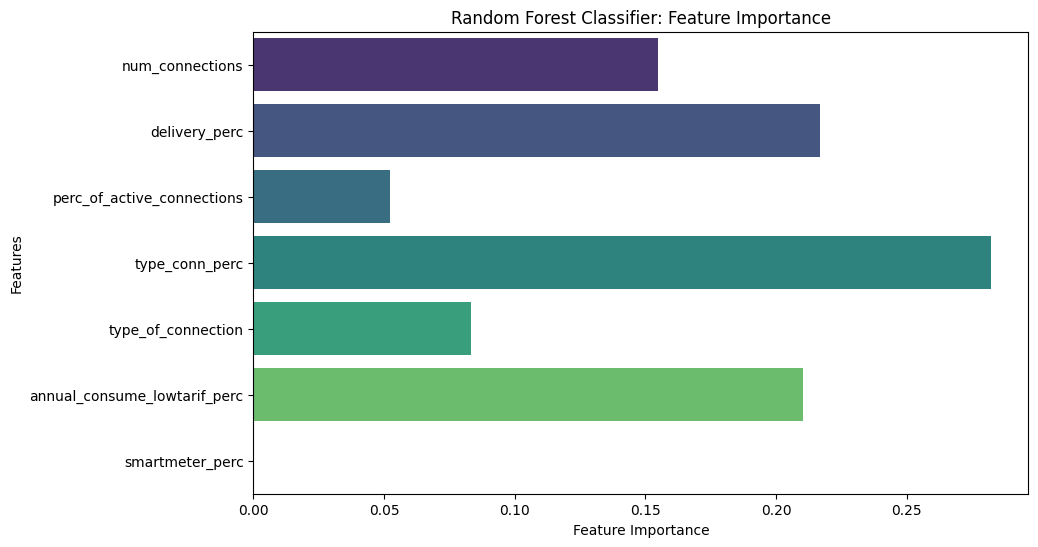

In [ ]:
feature_importances = RFC.feature_importances_
features = X_train_c.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, orient='h', palette='viridis')
plt.title('Random Forest Classifier: Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
df['annual_consume'] = target_regressor
df['city'] = target_classifier
df['city'] = label_encoder.fit_transform(df['city'])


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

df = pd.DataFrame(scaled_df)
df.columns = df.columns.astype(str)
dbscan = DBSCAN()
labels = dbscan.fit_predict(df)
score = silhouette_score(df, labels)
score

0.6182948891028471

In [ ]:
dbscan.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_clusters

1

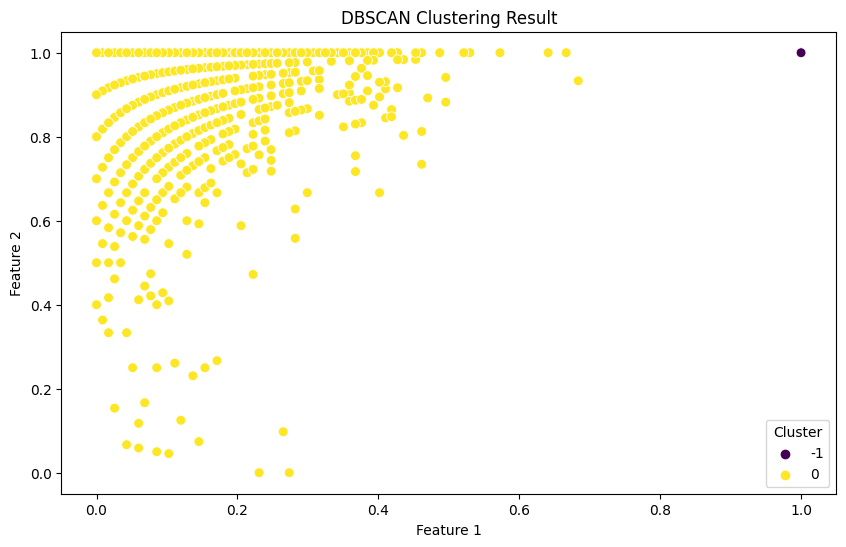

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for the first two columns (adjust as needed)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=labels, palette='viridis', s=50)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', loc='best')

In [ ]:
df = pd.concat([df, pd.Series(labels, name='Cluster')], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,Cluster
0,0.076923,0.8947,0.9474,0.853333,0.142857,0.8947,0.0,0.074252,0.333333,1.0,1.0,0
1,0.256410,1.0000,0.9750,0.733333,0.142857,0.9500,0.0,0.048594,0.666667,1.0,1.0,0
2,0.051282,1.0000,1.0000,1.000000,0.142857,1.0000,0.0,0.024150,0.666667,1.0,1.0,0
3,0.264957,0.9268,0.8537,0.386667,0.428571,0.9268,0.0,0.117806,0.666667,1.0,1.0,0
4,0.034188,0.8571,1.0000,0.146667,0.428571,1.0000,0.0,0.087219,0.666667,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0.145299,0.0741,1.0000,0.946667,0.142857,1.0000,0.0,0.045780,0.000000,1.0,1.0,0
2559,0.162393,0.6897,1.0000,0.773333,0.142857,1.0000,0.0,0.071567,0.000000,1.0,1.0,0
2560,0.128205,0.6000,1.0000,0.680000,0.142857,0.9600,0.0,0.092884,0.000000,1.0,1.0,0
2561,0.068376,0.4444,1.0000,0.920000,0.142857,1.0000,0.0,0.080138,0.000000,1.0,1.0,0


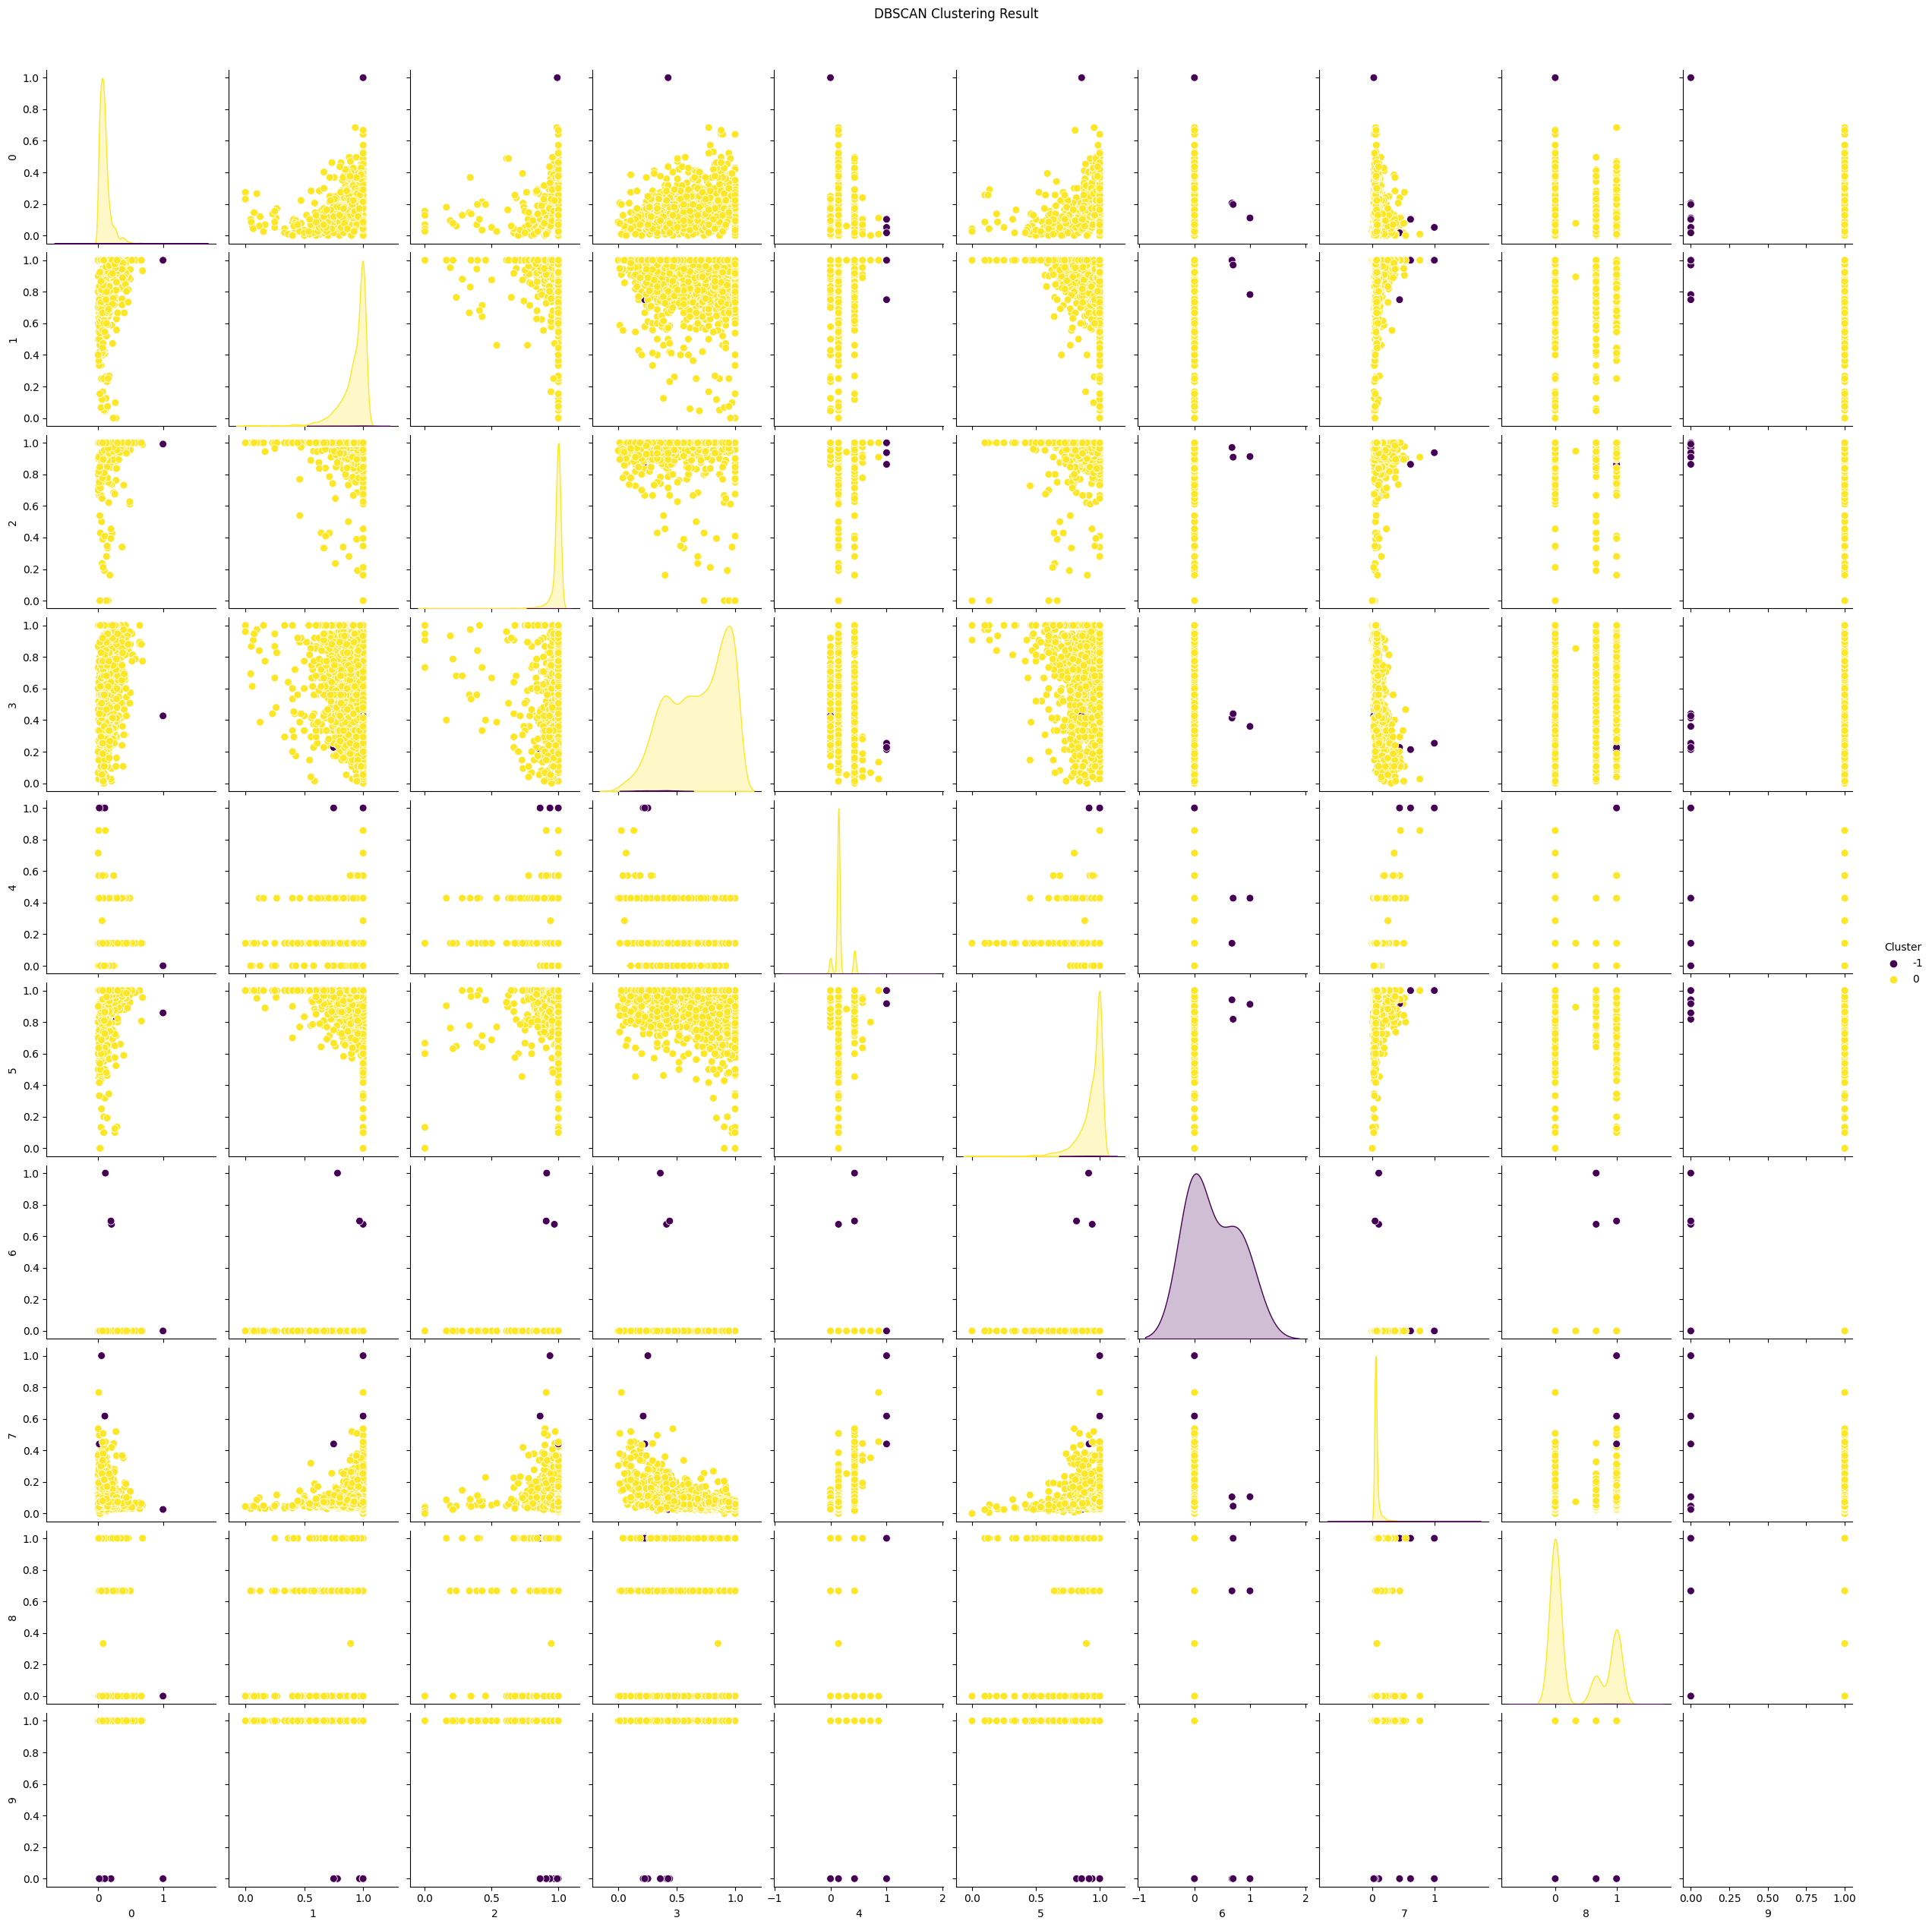

In [ ]:
sns.pairplot(df, hue='Cluster', palette='viridis', plot_kws={'s': 50})
plt.suptitle('DBSCAN Clustering Result', y=1.02)
plt.show()